In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
train_df = pd.read_csv("train_data.csv")
test_df = pd.read_csv('test_data.csv')
x_train, y_train = train_df['x_train'].tolist(), train_df['y_train'].tolist()
x_test, y_test = test_df['x_test'].tolist(), test_df['y_test'].tolist()

In [3]:
x_train = np.array(x_train)
x_train = x_train.reshape(x_train.shape[0], 1)
y_train = np.array(y_train)
y_train = y_train.reshape(y_train.shape[0], 1)
x_test = np.array(x_test)
x_test = x_test.reshape(x_test.shape[0], 1)
y_test = np.array(y_test)
y_test = y_test.reshape(y_test.shape[0], 1)

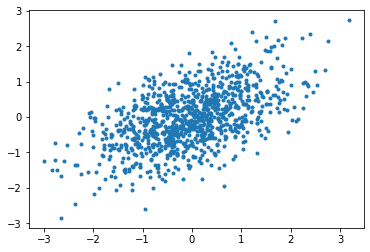

In [4]:
plt.plot(x_train, y_train, '.')

## Define Gradient Descent Function

In [5]:
def grad_desc(x, fx, y, w, lr):
    new_B0 = w[0] - lr * np.mean(np.dot((fx - y).T, x))
    new_B1 = w[1] - lr * np.mean((fx - y))
    return new_B0, new_B1

## Mean Square Err

In [6]:
# random init w[B0, B1]
# B0: slope, B1: intercept
mse_w = np.random.uniform(-5, 5, [2, 1])
print(mse_w)
mse_lr = 0.001
iter_num = 3000
mse_loss_history = []

[[-1.15197373]
 [ 4.68179342]]


In [7]:
# cost function
def MSE(fx, y):
    return np.mean(np.power(y - fx, 2)) / 2

In [8]:
# MSE Linear Regression
def MSE_LR(x, y, lr, w):
    for i in range(iter_num):
        fx = w[0] * x + w[1]
        loss = MSE(fx, y)
        mse_loss_history.append(loss)
        w[0], w[1] = grad_desc(x, fx, y, w, lr)
    return w

[[0.46357068]
 [0.23296749]]


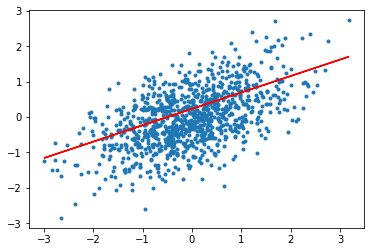

In [9]:
mse_w = MSE_LR(x_train, y_train, mse_lr, mse_w)
plt.plot(x_train, y_train, '.')
a = np.linspace(-3, 3)
plt.plot(x_train, mse_w[0] * x_train + mse_w[1], '-r')
print(mse_w)

## Mean Absolute Err

In [10]:
# random init B0, B1
mae_w = np.random.uniform(-10, 10, [2, 1])
mae_lr = 0.001
mae_loss_history = []

In [11]:
# cost function
def MAE(fx, y):
    return np.mean(np.absolute(fx - y)) / 2

In [12]:
# MAE Linear Regression
def MAE_LR(x, y, lr, w):
    for i in range(iter_num):
        fx = w[0] * x + w[1]
        loss = MAE(fx, y)
        mae_loss_history.append(loss)
        w[0], w[1] = grad_desc(x, fx, y, w, lr)
    return w

[[0.46933241]
 [0.35751385]]


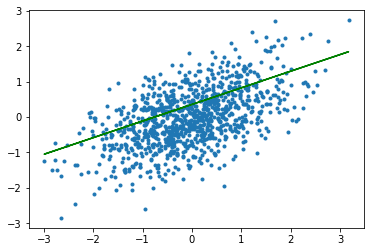

In [13]:
mae_w = MAE_LR(x_train, y_train, mae_lr, mae_w)
plt.plot(x_train, y_train, '.')
plt.plot(x_train, mae_w[0] * x_train + mae_w[1], '-g')
print(mae_w)

## Learning Curve

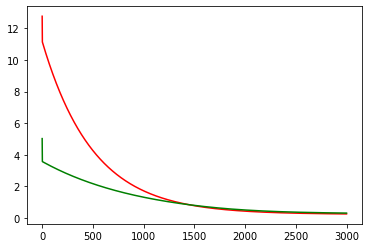

In [14]:
h = range(1, iter_num + 1)
plt.plot(h, mse_loss_history, '-r')
plt.plot(h, mae_loss_history, '-g')

## MSE Error & MAE Error of Prediction

In [15]:
# MSE of prediction
fx = mse_w[0] * x_test + mse_w[1]
mse_pred_loss = MSE(fx, y_test)

# MAE of prediction
fx = mae_w[0] * x_test + mae_w[1]
mae_pred_loss = MAE(fx, y_test)

print("Mean Square Error:", mse_pred_loss)
print("Mean Absolute Error:", mae_pred_loss)

Mean Square Error: 0.27042832995175725
Mean Absolute Error: 0.3101972483916318
